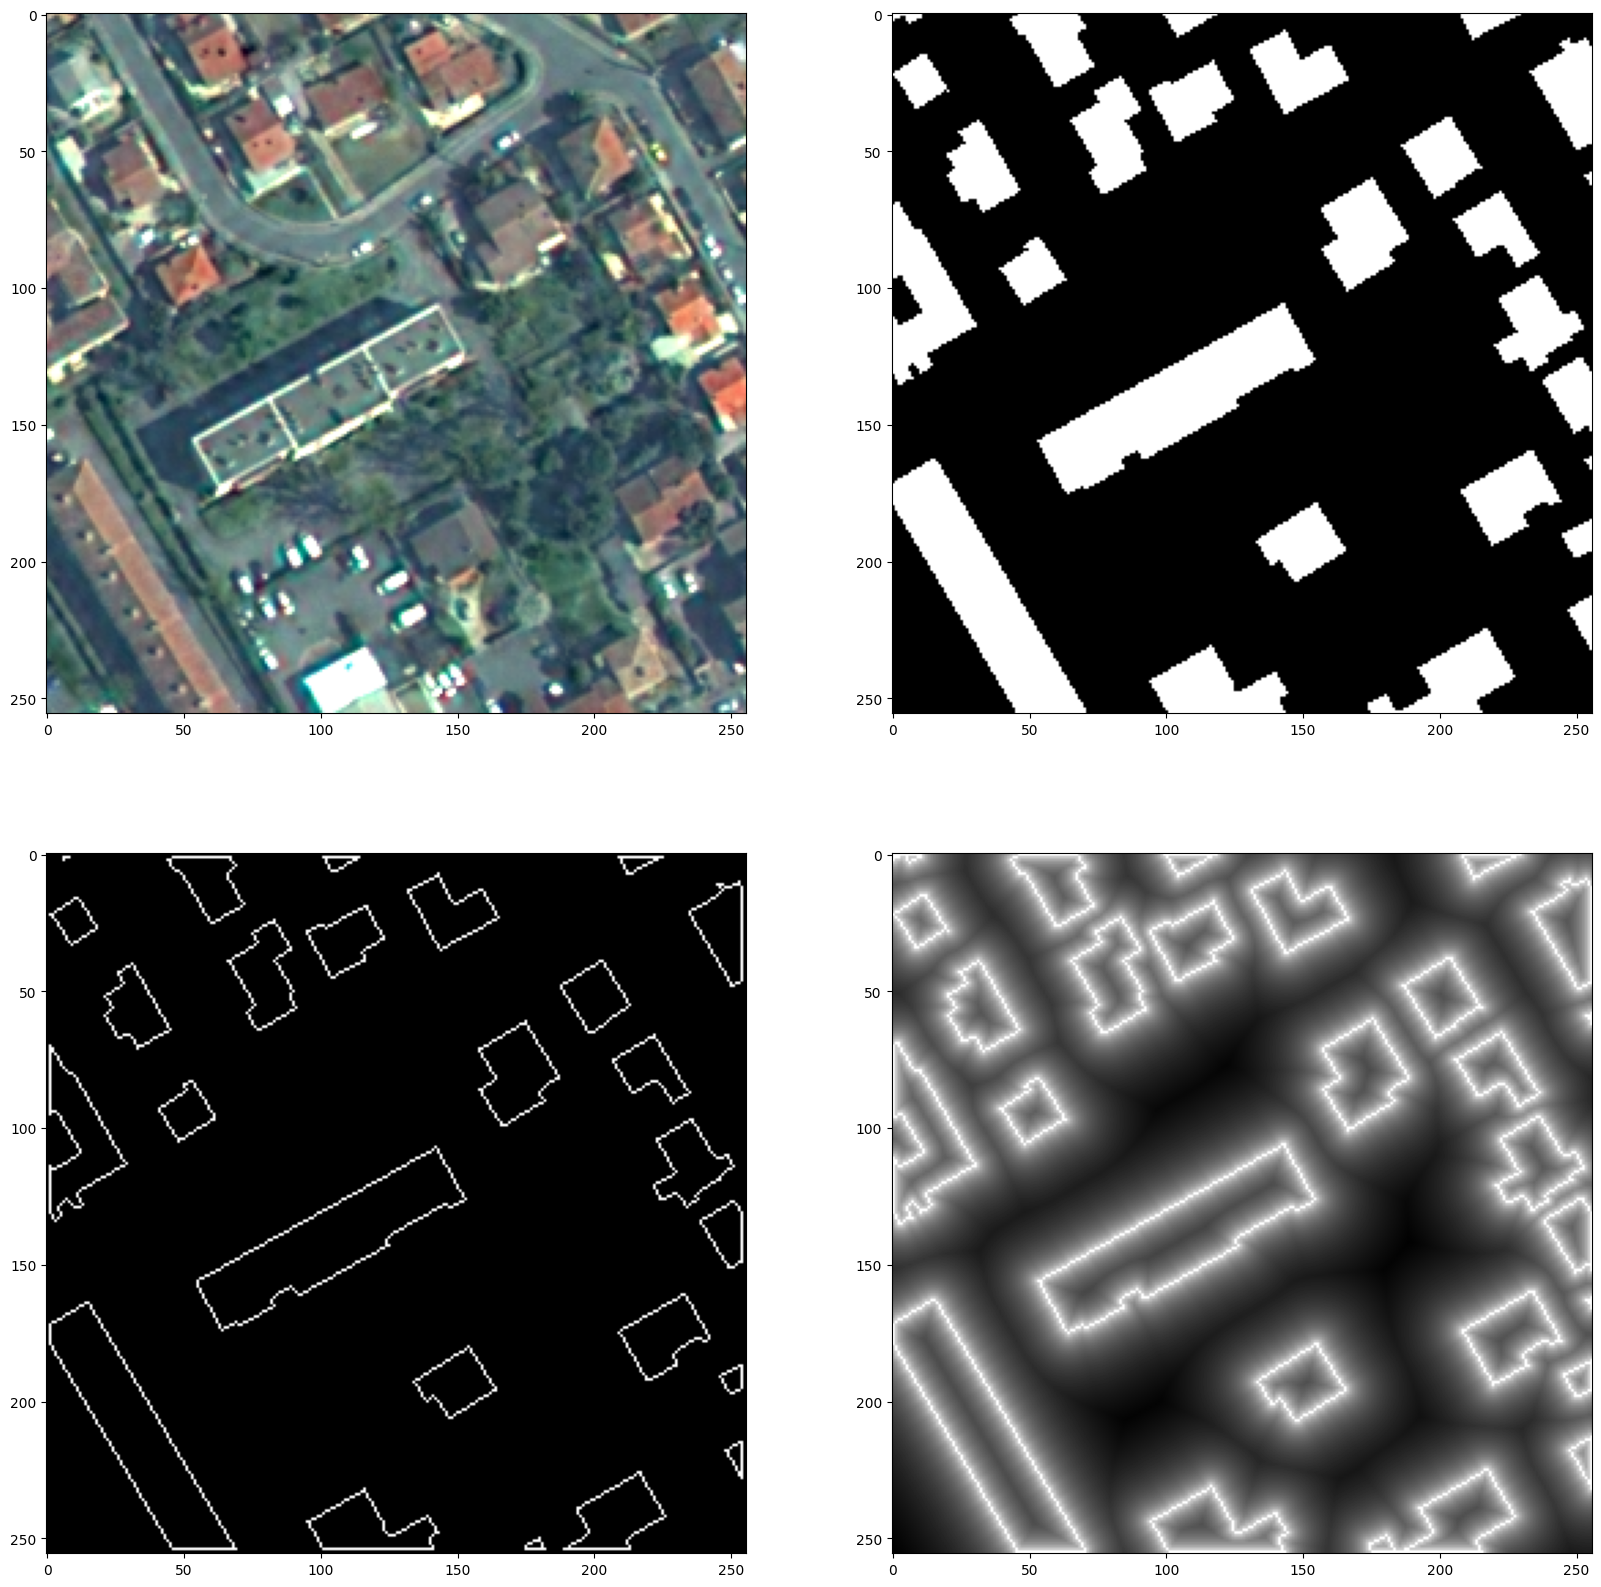

[[0.82220428 0.83459158 0.84927173 ... 0.78679344 0.78643759 0.78539079]
 [0.82317125 0.8359588  0.85133992 ... 0.79432823 0.79388963 0.79260507]
 [0.82317125 0.8359588  0.85133992 ... 0.80274156 0.80218837 0.80057794]
 ...
 [0.69242453 0.69398909 0.69558219 ... 0.7218871  0.72194259 0.7218871 ]
 [0.69159167 0.69311581 0.69466584 ... 0.71917191 0.71922309 0.71917191]
 [0.69073627 0.69221997 0.69372702 ... 0.71656484 0.7166122  0.71656484]]


In [51]:
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from rasterio.windows import Window
from scipy import ndimage

with rasterio.open("/data/SemCity-Toulouse-bench/semantic_05/TLS_indMap/TLS_indMap_08_1.tif") as f:
    label = np.transpose(f.read(window=Window(512, 512, 256, 256)))

with rasterio.open("/data/SemCity-Toulouse-bench/img_multispec_05/TLS_BDSD_RGB/TLS_BDSD_RGB_08.tif") as f:
    img = np.transpose(
        f.read(window=Window(512, 512, 256, 256))
    )
    
binary = (label==2).squeeze().astype(int)
    
def compute_weights(binary, factor=0.1):
    #binary = ndimage.binary_erosion(binary).astype(int)
    edges = binary - ndimage.binary_erosion(binary)
    dist = ndimage.distance_transform_edt(1-edges)+1
    w = 1/dist**factor
    return w
    
#weights1 = ndimage.gaussian_filter(edges.astype(float), sigma=3)*200.
#dist = ndimage.distance_transform_edt(1-edges)+1
#weights2 = 1/dist**0.1
#print(np.max(weights2))

#kernel = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]], dtype=np.float32)
#edges = ndimage.convolve(building, weights=kernel)
#edges = np.clip(edges, 0, 255).astype(np.uint8)

#dist = ndimage.distance_transform_edt(building)
#dist[dist <= 2] = 0
#dist[dist > 2] = 1
#

fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.imshow(img)
ax2.imshow(binary, cmap="gray")
ax3.imshow(edges, cmap="gray")
ax4.imshow(compute_weights(binary, factor=0.1), cmap="gray")
plt.show(block=True)
print(weights2)

In [74]:
binary = np.zeros((2,1,15,15), dtype=int)
binary[0,:,1:12, 2:11] = 1
binary[1,:,0:8, 4:15] = 1
binary

array([[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
         [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
         [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
         [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
         [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
         [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
         [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
         [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
         [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
         [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
         [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]],


       [[[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
         [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
         [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1

In [75]:
edges = binary - ndimage.binary_erosion(binary, structure=np.ones((1,1,3,3)))
edges

array([[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
         [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
         [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
         [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
         [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
         [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
         [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
         [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
         [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
         [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
         [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]],


       [[[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
         [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
         [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0

In [79]:
dist = ndimage.distance_transform_edt(1-edges, sampling=[512, 512, 1, 1])+1
w = 1/dist**0.1
print(w.shape)
with np.printoptions(precision=2, suppress=True):
    print(w[0,0,:10,:10])

(2, 1, 15, 15)
[[0.89 0.92 0.93 0.93 0.93 0.93 0.93 0.93 0.93 0.93]
 [0.9  0.93 1.   1.   1.   1.   1.   1.   1.   1.  ]
 [0.9  0.93 1.   0.93 0.93 0.93 0.93 0.93 0.93 0.93]
 [0.9  0.93 1.   0.93 0.9  0.9  0.9  0.9  0.9  0.93]
 [0.9  0.93 1.   0.93 0.9  0.87 0.87 0.87 0.9  0.93]
 [0.9  0.93 1.   0.93 0.9  0.87 0.85 0.87 0.9  0.93]
 [0.9  0.93 1.   0.93 0.9  0.87 0.85 0.87 0.9  0.93]
 [0.9  0.93 1.   0.93 0.9  0.87 0.85 0.87 0.9  0.93]
 [0.9  0.93 1.   0.93 0.9  0.87 0.87 0.87 0.9  0.93]
 [0.9  0.93 1.   0.93 0.9  0.9  0.9  0.9  0.9  0.93]]
